# PH413 Computation Physics - Practice [Week 11]

**======================== ★ Assignment 1 ★ ========================**
* Applying the Metropolis-Hastings algorithm, implemnet the 2D ising model and plot the magnetization with respect to temperature.

* The Metropolis-Hastings algorithm follows these steps:
    1. Pick a initial spin configuration $x$.
    2. Pick a new spin configuration $x'$ (flip the spin of a randomly chosen lattice site).
    3. Make a random choice to take the new configuration or keep the old one, weighted by the relative likelihoods of the new configuration vs. the old one $p(x')/p(x)$.
    4. Repeat 2 to 3 until the system converges (or until $N$ stpes).
  
* Note that $p(x) \propto \exp{\left( -E(x)/T \right)}$ where $E(x) = -J\sum_{\langle i, j\rangle}s_i s_j$ so that $p(x')/p(x) = \exp{\left( -\left[E(x') - E(x)\right]/ k_B T \right)}$.

* Set $J=1$, $k_B=1$ for simplicity.

**==========================================================**


In [1]:
import numpy as np
from numpy.random import randint, rand

def initial_config(N):   
    ''' 
    Generates a random spin configuration for initial condition
    '''
    config = 2*np.random.randint(2, size=(N,N))-1
    return config

def cal_Energy(config):
    Energy = 0
    N = config.shape[0]
    for i in range(N-1):
        for j in range(N-1):
            spin_val = config[i,j]
            Energy_of_spin = spin_val * (config[i,j+1] + config[i, j-1] + config[i+1,j] + config[i-1,j])
            Energy += Energy_of_spin
        # on the edge we need to do it by hand
        spin_val = config[i,N-1]
        Energy_of_spin = spin_val * (config[i,0] + config[i, N-2] + config[i+1,N-1] + config[i-1,N-1])
        Energy += Energy_of_spin
        
    for j in range(N-1):
        spin_val = config[N-1,j]
        Energy_of_spin = spin_val * (config[N-1,j+1] + config[N-1, j-1] + config[0,j] + config[N-2,j])
        Energy += Energy_of_spin
    # on the edge we need to do it by hand
    spin_val = config[N-1,N-1]
    Energy_of_spin = spin_val * (config[N-1,0] + config[N-1, N-2] + config[0,N-1] + config[N-2,N-1])
    Energy += Energy_of_spin
    return Energy / -2 # divide here because every interaction has been counted twice


def cal_Magnetization(config):
    '''
    Magnetization of a given configuration
    '''
    mag = np.sum(config)
    return mag/config.size


def time_step(config, T):
    i = randint(0,N)
    j = randint(0,N)
    
    Energy_before = cal_Energy(config)
    config[i,j] *= -1 # simulate flip
    Energy_after = cal_Energy(config)
    config[i,j] *= -1 # flip it back
    
    beta = 1 / T
    delta_E = Energy_after - Energy_before
    p = np.exp(-1 * delta_E * beta)
    random_number = rand()
    if (random_number <= p):
        config[i,j] = -1 * config[i,j] # accepted => flip spin


# complete sweep so that on average each spin has been offered a flip
def sweep(config, T):
    N = config.shape[0]
    for _ in range(N*N):
        time_step(config, T)
        
def many_sweeps(config, T, N=100):
    for _ in range(N):
        sweep(config, T)
        
def measurement_magnetiziation(T,N, single_measurements=5):
    config = initial_config(N)
    many_sweeps(config,T)
    results = []
    for _ in range(single_measurements):
        results.append(np.abs(cal_Magnetization(config)))
        many_sweeps(config,T,N=5)
    return np.average(results), np.std(results)

def print_grid(config):
    N = config.shape[0]
    for i in range(N):
        for j in range(N):
            if (config[i,j] == 1):
                print("#", end ="")
            else:
                print(" ", end="")
        print("", end="\n")

In [2]:
N = 10
T = np.linspace(.05, 10,40)
M_ave = []
M_std = []
for tempe in T:
    ave, std = measurement_magnetiziation(tempe,N)
    M_ave.append(ave)
    M_std.append(std)

Text(0, 0.5, 'M')

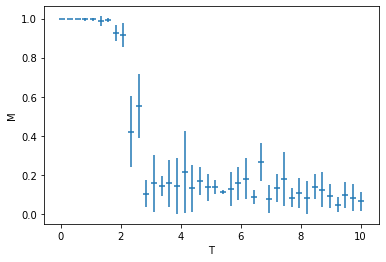

In [3]:
import matplotlib.pyplot as plt
plt.errorbar(T, M_ave,xerr=.1, yerr=M_std, ls='')
plt.xlabel('T')
plt.ylabel('M')